# Аренда квартир в Москве

Данные по аренде квартир от 27/02/2022

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Anacondaz\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


# 1. Данные

__Cсылка на данные:__ https://www.kaggle.com/datasets/timmofeyy/realestaterent

In [2]:
df = pd.read_csv("rent_apartment_moscow_2.csv")
df

,Unnamed: 0,metro,price,minutes,way,provider,fee_percent,views,storey,storeys,rooms,total_area,living_area,kitchen_area
0,0,Akademicheskaia,95000,10,walk,agency,0,36,7.0,25.0,3,120.000000,53.000000,17.000000
1,1,Dmitrovskaia,38000,10,walk,realtor,50,26,7.0,9.0,1,34.000000,18.000000,12.000000
2,2,Novye Cheremushki,70000,5,walk,agency,50,663,9.0,17.0,2,60.000000,32.000000,12.000000
3,3,Krasnopresnenskaia,100000,3,walk,realtor,0,2192,5.0,5.0,3,74.000000,30.000000,30.000000
4,4,Domodedovskaia,73000,17,walk,agency,40,92,10.0,14.0,3,71.000000,60.000000,10.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8193,8193,No data,450000,0,walk,agency,0,119,3.0,5.0,5,67.181777,67.181777,67.181777
8194,8194,No data,200000,0,walk,agency,0,81,30.0,86.0,2,67.181777,67.181777,67.181777
8195,8195,No data,179000,0,walk,agency,0,56,18.0,22.0,3,67.181777,67.181777,67.181777
8196,8196,No data,390000,0,walk,agency,0,32,16.0,19.0,3,67.181777,67.181777,67.181777


In [3]:
#df.style.format({'Profit': '{:.2f}'})
# for col in df:
#     df[col] = df.style.format({'metro': '{:.15f}'})

# for col in df:
#     df[col] = pd.set_option("display.float_format", "{:.2f}".format)

# 2. Обработка данных

Удаляем следующие данные:
- Индексы, которые не несут никакую информацию
- Колонку под названием `"total_area"` из-за содержания сомнительных данных в большом количестве строк _(например, общая площадь меньше жилой или соответствует последней)_
- Строки с пропущенными значениями
- Строки-дубликаты
- Данные по квартирам, которые содержат больше 95 этажей _(95 этажей - самое большое здание в Москве)_, т.е. явряются выбросами
- Данные по квартирам относительно которых отсутствует информация о ближайшей станции метро, т.к. не подходят для анализа и способны исказить результаты
- Данные по квартирам, у которых в колонке с количеством комнат отражены либо "0", либо "+", т.к. они не подлежат анализу
- Данные по квартирам, где жилая площадь равняется площади кухни, поскольку такие наблюдения могут исказить итоговый анализ _(таких наблюдений 1868 штук)_
- Данные исходя из которых добираться до метро необходимо на транспорте и при этом время до метро составляет 0 минут

In [4]:
df.drop(columns = ['Unnamed: 0'], inplace=True) #, 'total_area'
df.dropna(inplace = True)
df.drop_duplicates(inplace=True)

df = df[df.storeys <= 95]
df = df[df["metro"].str.contains("No data") == False]

df = df[df.rooms != '0']
df = df[df.rooms != '+']

df = df[df.living_area != df.kitchen_area] 

df.drop(df[(df.way == 'transport')&(df.minutes == 0)].index.to_list(), inplace=True)

df

,metro,price,minutes,way,provider,fee_percent,views,storey,storeys,rooms,total_area,living_area,kitchen_area
0,Akademicheskaia,95000,10,walk,agency,0,36,7.0,25.0,3,120.0,53.0,17.0
1,Dmitrovskaia,38000,10,walk,realtor,50,26,7.0,9.0,1,34.0,18.0,12.0
2,Novye Cheremushki,70000,5,walk,agency,50,663,9.0,17.0,2,60.0,32.0,12.0
4,Domodedovskaia,73000,17,walk,agency,40,92,10.0,14.0,3,71.0,60.0,10.0
5,Taganskaia,60000,10,walk,realtor,50,995,3.0,5.0,3,75.0,48.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6590,Maiakovskaia,90000,11,walk,Застройщик,30,45,6.0,12.0,3,80.0,64.0,12.0
6591,Sokol,60000,17,walk,Застройщик,30,21,13.0,30.0,2,56.0,45.0,10.0
6593,Lubianka,200000,6,walk,Застройщик,0,2,3.0,8.0,3,122.0,73.0,13.0
6594,Planernaia,50000,21,transport,owner,0,50,3.0,16.0,1,42.0,20.0,10.0


__Результат:__ от 8198 наблюдений осталось 3612

Анализируем данные по арендодателям:

In [5]:
df.provider.unique()

array(['agency                \xa0 \xa0 ',
       'realtor                \xa0 \xa0 ', 'owner                 ',
       'realtor                 ', 'agency                 ',
       'agency                \xa0 \xa0\xa0 \xa0 ',
       'Застройщик                 '], dtype=object)

Поскольку данные, содержащие одну и ту же информацию записаны по разному, необходимо заменить названия на одинаковые для дальнейшего анализа

In [6]:
df.provider.replace(['agency                 ', 
                     'agency                \xa0 \xa0 ', 
                     'agency                \xa0 \xa0\xa0 \xa0 '], 'agency', inplace=True)
df.provider.replace(['realtor                 ', 
                     'realtor                \xa0 \xa0 '], 'realtor', inplace=True)
df.provider.replace('owner                 ', 'owner', inplace=True)
df.provider.replace('Застройщик                 ', 'developer', inplace=True)

df.head()

,metro,price,minutes,way,provider,fee_percent,views,storey,storeys,rooms,total_area,living_area,kitchen_area
0,Akademicheskaia,95000,10,walk,agency,0,36,7.0,25.0,3,120.0,53.0,17.0
1,Dmitrovskaia,38000,10,walk,realtor,50,26,7.0,9.0,1,34.0,18.0,12.0
2,Novye Cheremushki,70000,5,walk,agency,50,663,9.0,17.0,2,60.0,32.0,12.0
4,Domodedovskaia,73000,17,walk,agency,40,92,10.0,14.0,3,71.0,60.0,10.0
5,Taganskaia,60000,10,walk,realtor,50,995,3.0,5.0,3,75.0,48.0,12.0


Заменяем текстовые и переменные типа `float` на переменные типа `int`

In [7]:
df[['storey', 
    'storeys', 
    'rooms', 
    'living_area', 
    'kitchen_area']] = df[['storey', 'storeys', 'rooms', 'living_area', 'kitchen_area']].astype(int)

df.head()

,metro,price,minutes,way,provider,fee_percent,views,storey,storeys,rooms,total_area,living_area,kitchen_area
0,Akademicheskaia,95000,10,walk,agency,0,36,7,25,3,120.0,53,17
1,Dmitrovskaia,38000,10,walk,realtor,50,26,7,9,1,34.0,18,12
2,Novye Cheremushki,70000,5,walk,agency,50,663,9,17,2,60.0,32,12
4,Domodedovskaia,73000,17,walk,agency,40,92,10,14,3,71.0,60,10
5,Taganskaia,60000,10,walk,realtor,50,995,3,5,3,75.0,48,12


# 3. Визуализация данных

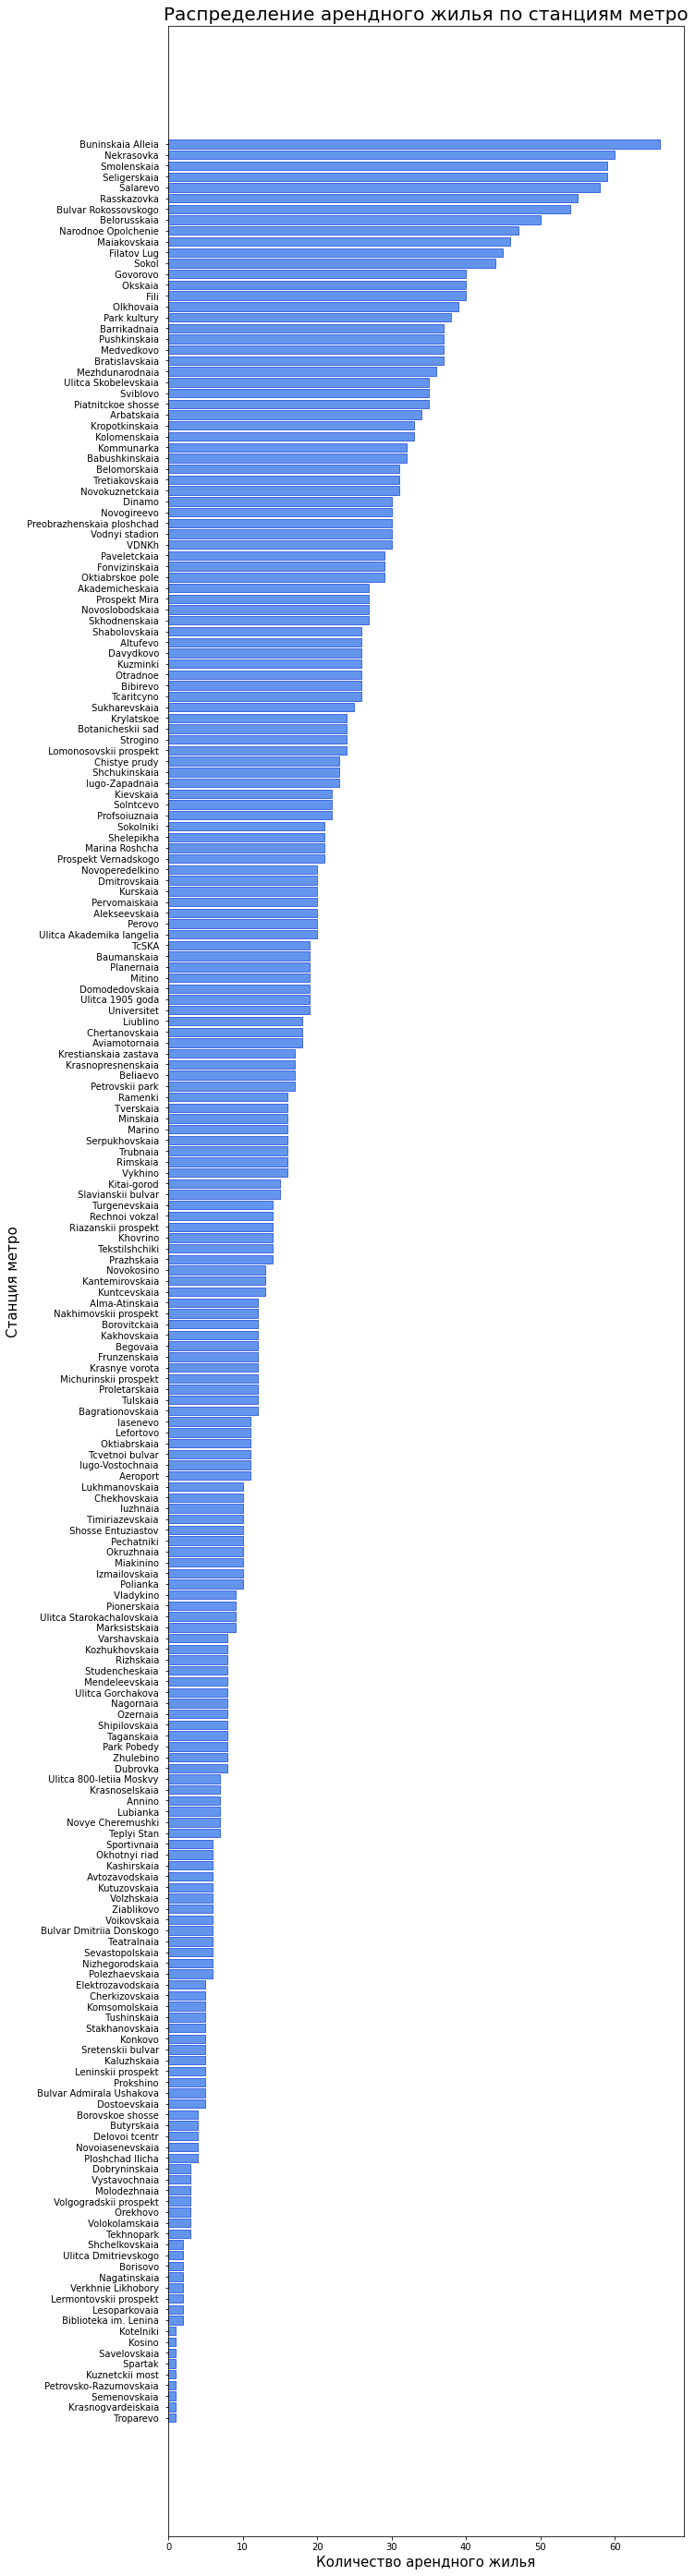

In [8]:
metro_stations = pd.DataFrame(df.metro.value_counts()).reset_index().sort_values(by='metro')
y = metro_stations['index'].to_list()
x = metro_stations['metro'].to_list()

fig, ax = plt.subplots(figsize=(10, 50))

ax.set_title('Распределение арендного жилья по станциям метро', fontsize=20)
ax.set_xlabel('Количество арендного жилья', fontsize=15)
ax.set_ylabel('Станция метро', fontsize=15)

plt.barh(y, x, color='cornflowerblue', edgecolor='royalblue')
plt.savefig('Metro.png', facecolor ="white", edgecolor ='white')

plt.show()

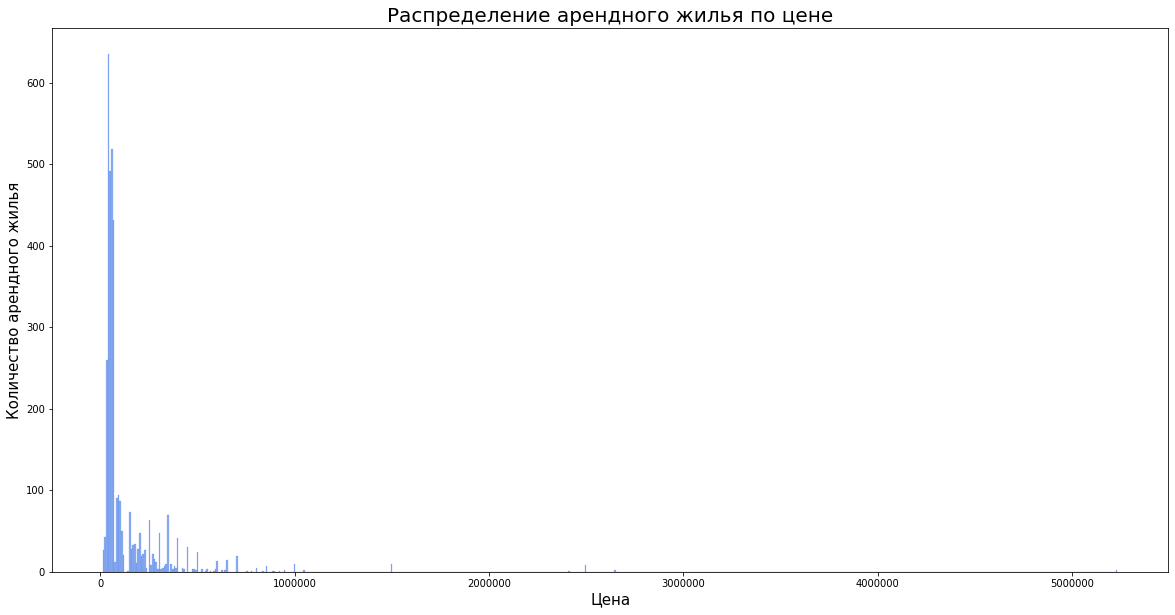

In [9]:
fig, ax = plt.subplots(figsize=(20, 10))

ax.set_title('Распределение арендного жилья по цене', fontsize=20)
ax.set_xlabel('Цена', fontsize=15)
ax.set_ylabel('Количество арендного жилья', fontsize=15)

sns.histplot(df.price[:100000],
             color='cornflowerblue',
             edgecolor='royalblue')

plt.ticklabel_format(style='plain', axis='x')
plt.savefig('Price.png', facecolor ="white", edgecolor ='white')

plt.show()

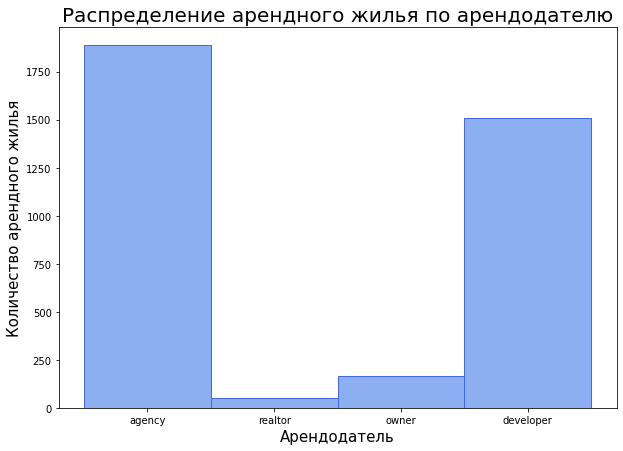

In [10]:
fig, ax = plt.subplots(figsize=(10, 7))

ax.set_title('Распределение арендного жилья по арендодателю', fontsize=20)
ax.set_xlabel('Арендодатель', fontsize=15)
ax.set_ylabel('Количество арендного жилья', fontsize=15)

sns.histplot(df.provider,
             color='cornflowerblue',
             edgecolor='royalblue')

plt.savefig('Provider.png', facecolor ="white", edgecolor ='white')

plt.show()

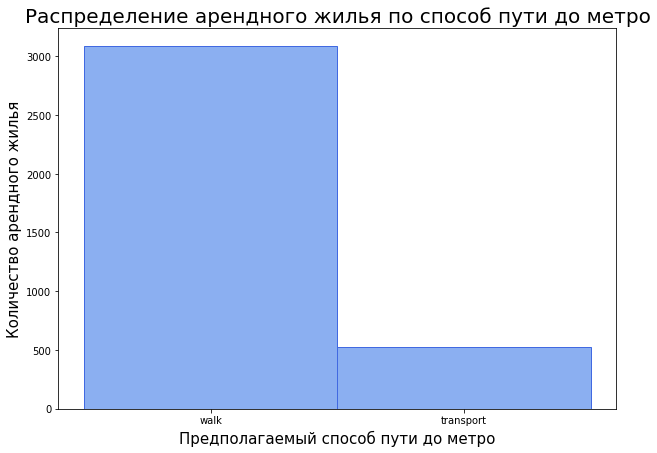

In [11]:
fig, ax = plt.subplots(figsize=(10, 7))

ax.set_title('Распределение арендного жилья по способ пути до метро', fontsize=20)
ax.set_xlabel('Предполагаемый способ пути до метро', fontsize=15)
ax.set_ylabel('Количество арендного жилья', fontsize=15)

sns.histplot(df.way,
             color='cornflowerblue',
             edgecolor='royalblue')

plt.savefig('Way.png', facecolor ="white", edgecolor ='white')

plt.show()

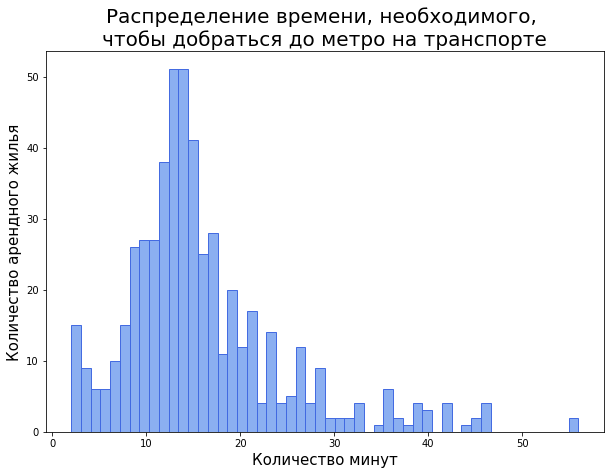

In [12]:
fig, ax = plt.subplots(figsize=(10, 7))

ax.set_title('Распределение времени, необходимого, \nчтобы добраться до метро на транспорте', fontsize=20)
ax.set_xlabel('Количество минут', fontsize=15)
ax.set_ylabel('Количество арендного жилья', fontsize=15)

df_t = df[df.way=='transport']
sns.histplot(df_t.minutes,
             bins=52,
             color='cornflowerblue',
             edgecolor='royalblue')

plt.savefig('Minutes_transport.png', facecolor ="white", edgecolor ='white')

plt.show()

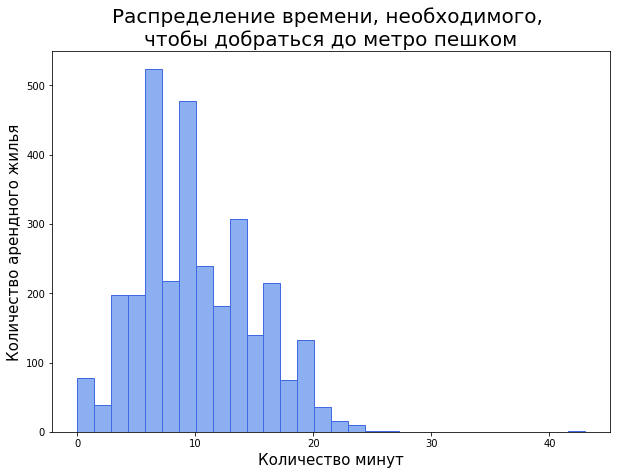

In [13]:
fig, ax = plt.subplots(figsize=(10, 7))

ax.set_title('Распределение времени, необходимого, \nчтобы добраться до метро пешком', fontsize=20)
ax.set_xlabel('Количество минут', fontsize=15)
ax.set_ylabel('Количество арендного жилья', fontsize=15)

df_w = df[df.way=='walk']
sns.histplot(df_w.minutes,
             bins=30,
             color='cornflowerblue',
             edgecolor='royalblue')

plt.savefig('Minutes_walk.png', facecolor ="white", edgecolor ='white')

plt.show()

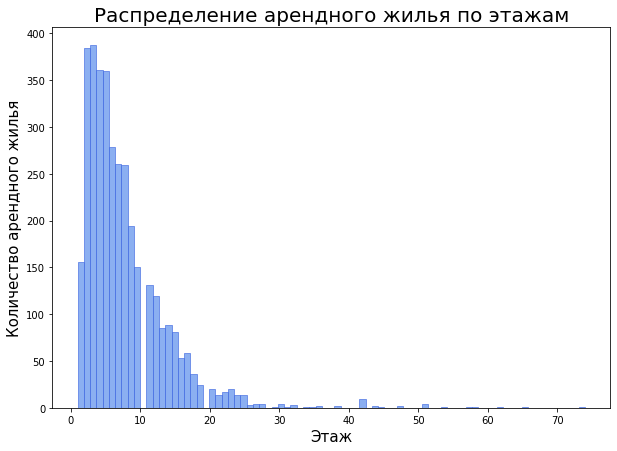

In [14]:
fig, ax = plt.subplots(figsize=(10, 7))

ax.set_title('Распределение арендного жилья по этажам', fontsize=20)
ax.set_xlabel('Этаж', fontsize=15)
ax.set_ylabel('Количество арендного жилья', fontsize=15)

sns.histplot(df.storey,
             color='cornflowerblue',
             edgecolor='royalblue')

plt.savefig('Storey.png', facecolor ="white", edgecolor ='white')

plt.show()

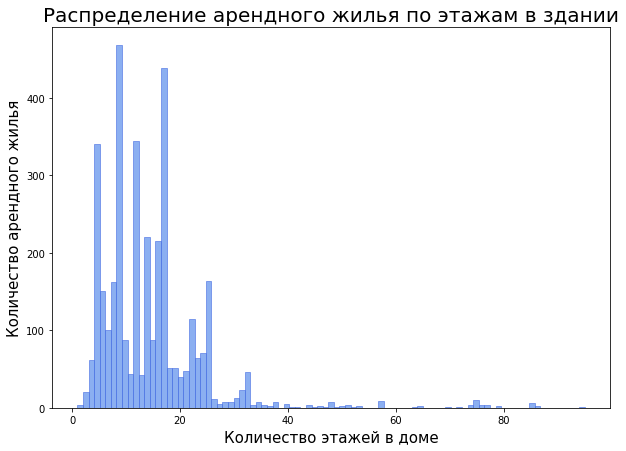

In [15]:
fig, ax = plt.subplots(figsize=(10, 7))

ax.set_title('Распределение арендного жилья по этажам в здании', fontsize=20)
ax.set_xlabel('Количество этажей в доме', fontsize=15)
ax.set_ylabel('Количество арендного жилья', fontsize=15)

sns.histplot(df.storeys,
             color='cornflowerblue',
             edgecolor='royalblue')

plt.savefig('Storeys.png', facecolor ="white", edgecolor ='white')

plt.show()

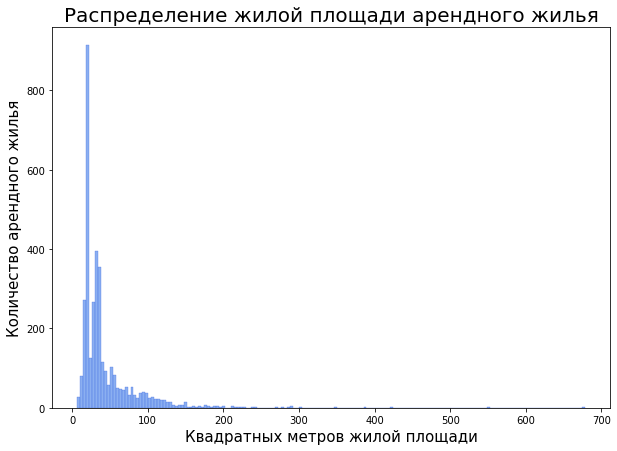

In [16]:
fig, ax = plt.subplots(figsize=(10, 7))

ax.set_title('Распределение жилой площади арендного жилья', fontsize=20)
ax.set_xlabel('Квадратных метров жилой площади', fontsize=15)
ax.set_ylabel('Количество арендного жилья', fontsize=15)

sns.histplot(df.living_area,
             color='cornflowerblue',
             edgecolor='royalblue')

plt.savefig('Living_area.png', facecolor ="white", edgecolor ='white')

plt.show()

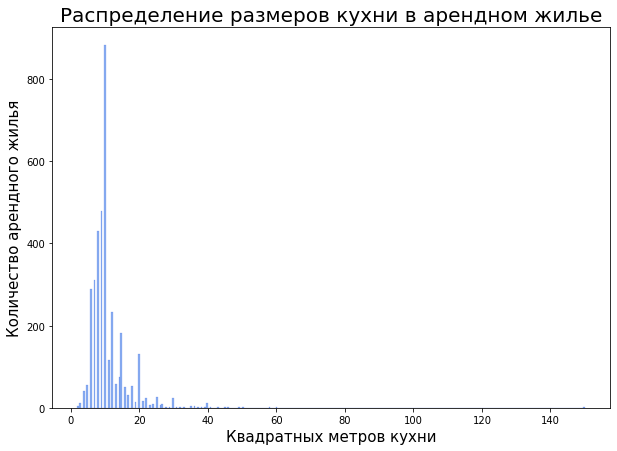

In [17]:
fig, ax = plt.subplots(figsize=(10, 7))

ax.set_title('Распределение размеров кухни в арендном жилье', fontsize=20)
ax.set_xlabel('Квадратных метров кухни', fontsize=15)
ax.set_ylabel('Количество арендного жилья', fontsize=15)

sns.histplot(df.kitchen_area,
             color='cornflowerblue',
             edgecolor='royalblue')

plt.savefig('Kitchen_area.png', facecolor ="white", edgecolor ='white')

plt.show()

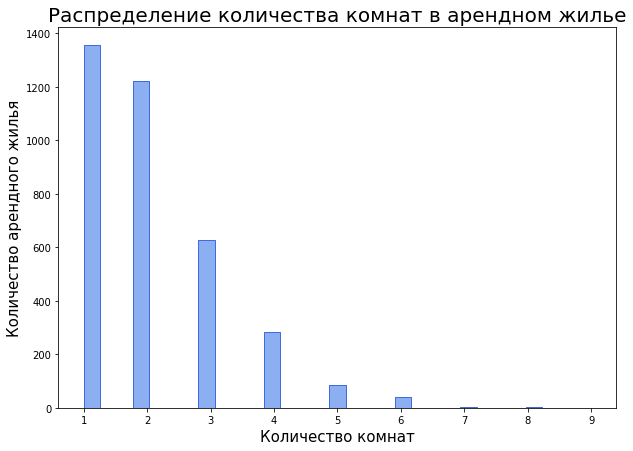

In [18]:
fig, ax = plt.subplots(figsize=(10, 7))

ax.set_title('Распределение количества комнат в арендном жилье', fontsize=20)
ax.set_xlabel('Количество комнат', fontsize=15)
ax.set_ylabel('Количество арендного жилья', fontsize=15)

sns.histplot(df.rooms,
             color='cornflowerblue',
             edgecolor='royalblue')

plt.savefig('Rooms.png', facecolor ="white", edgecolor ='white')

plt.show()

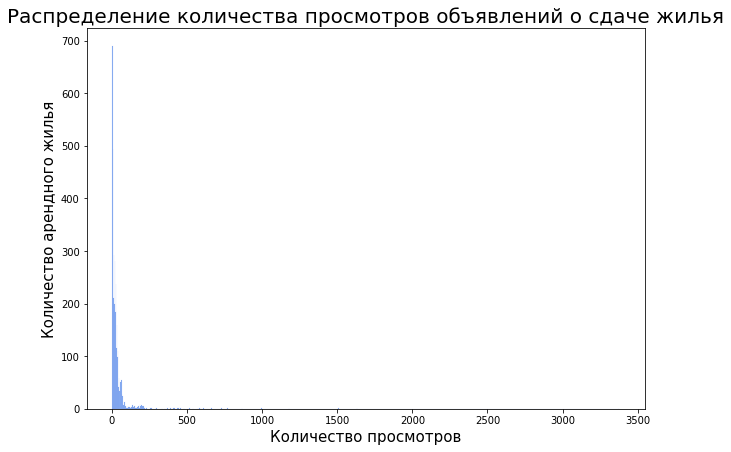

In [19]:
fig, ax = plt.subplots(figsize=(10, 7))

ax.set_title('Распределение количества просмотров объявлений о сдаче жилья', fontsize=20)
ax.set_xlabel('Количество просмотров', fontsize=15)
ax.set_ylabel('Количество арендного жилья', fontsize=15)

sns.histplot(df.views,
             color='cornflowerblue',
             edgecolor='royalblue')

plt.savefig('Views.png', facecolor ="white", edgecolor ='white')

plt.show()

# 4. Обработка зависимой переменной

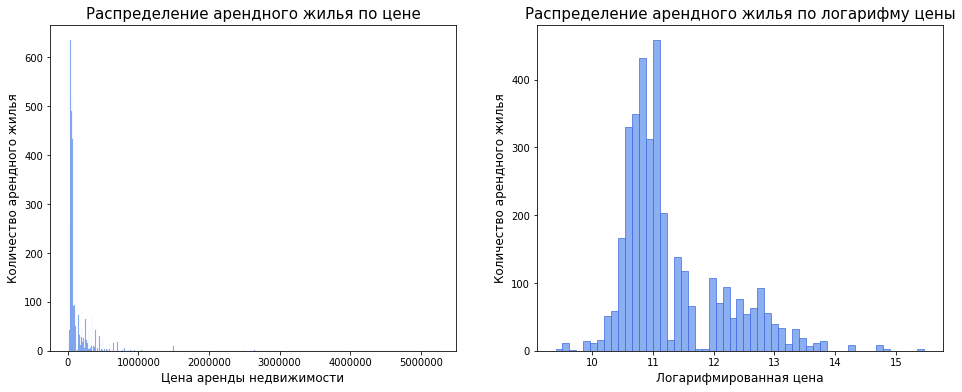

In [20]:
plt.figure(figsize = (16, 6))

plt.subplot(1, 2, 1)
sns.histplot(df.price, color='cornflowerblue', edgecolor='royalblue')
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel('Цена аренды недвижимости', fontsize=12)
plt.ylabel('Количество арендного жилья', fontsize=12)
plt.title('Распределение арендного жилья по цене', fontsize=15)

plt.subplot(1, 2, 2)
sns.histplot(np.log(df.price), color='cornflowerblue', edgecolor='royalblue')
plt.xlabel('Логарифмированная цена', fontsize=12)
plt.ylabel('Количество арендного жилья', fontsize=12)
plt.title('Распределение арендного жилья по логарифму цены', fontsize=15)

plt.show()

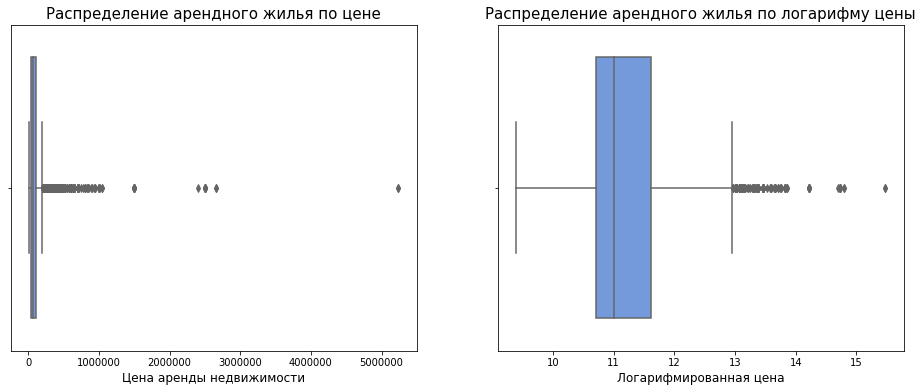

In [21]:
plt.figure(figsize = (16, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x=df.price, color='cornflowerblue')
plt.xlabel('Цена аренды недвижимости', fontsize=12)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Распределение арендного жилья по цене', fontsize=15)

plt.subplot(1, 2, 2)
sns.boxplot(x=np.log(df.price), color='cornflowerblue')
plt.xlabel('Логарифмированная цена', fontsize=12)
plt.title('Распределение арендного жилья по логарифму цены', fontsize=15)

plt.show()

# 5. Добавление дополнительных переменных на основе данных о станции метро

In [22]:
df_metro = pd.read_excel('Metro stations.xlsx')
df_metro.rename(columns = {'Станция метро':"metro"}, inplace=True)

df_metro.head()

,metro,Адм. Округа,По районам,За МКАД,Конечная,МЦК,D1,D2,Пересадка на загородные электрички,Ветки метро,Все пересадки,Центр,Кольцевая,БКЛ,Больше одной станции,Внутри ТТК
0,Aeroport,САО,Аэропорт,0,0,0,0,0,0,1,1,0,0,0,0,0
1,Akademicheskaia,ЮЗАО,Академический,0,0,0,0,0,0,1,1,0,0,0,0,0
2,Alekseevskaia,СВАО,Алексеевский,0,0,0,0,0,0,1,1,0,0,0,0,0
3,Alma-Atinskaia,ЮАО,Братеево,0,1,0,0,0,0,1,1,0,0,0,0,0
4,Altufevo,СВАО,Бибирево,0,1,0,0,0,0,1,1,0,0,0,0,0


In [23]:
df = pd.merge(df, df_metro, on='metro')
df

,metro,price,minutes,way,provider,fee_percent,views,storey,storeys,rooms,...,D1,D2,Пересадка на загородные электрички,Ветки метро,Все пересадки,Центр,Кольцевая,БКЛ,Больше одной станции,Внутри ТТК
0,Akademicheskaia,95000,10,walk,agency,0,36,7,25,3,...,0,0,0,1,1,0,0,0,0,0
1,Akademicheskaia,70000,14,walk,realtor,0,95,5,5,2,...,0,0,0,1,1,0,0,0,0,0
2,Akademicheskaia,25000,8,walk,agency,48,29,15,16,1,...,0,0,0,1,1,0,0,0,0,0
3,Akademicheskaia,95000,13,walk,developer,50,9,6,17,3,...,0,0,0,1,1,0,0,0,0,0
4,Akademicheskaia,60000,13,walk,developer,50,42,1,10,1,...,0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3608,Polezhaevskaia,110000,10,walk,owner,0,3,6,6,3,...,0,0,0,2,3,0,0,1,1,0
3609,Polezhaevskaia,53000,9,walk,agency,50,4,2,8,2,...,0,0,0,2,3,0,0,1,1,0
3610,Polezhaevskaia,60000,13,walk,agency,60,25,3,6,1,...,0,0,0,2,3,0,0,1,1,0
3611,Polezhaevskaia,100000,5,walk,developer,25,18,9,22,3,...,0,0,0,2,3,0,0,1,1,0


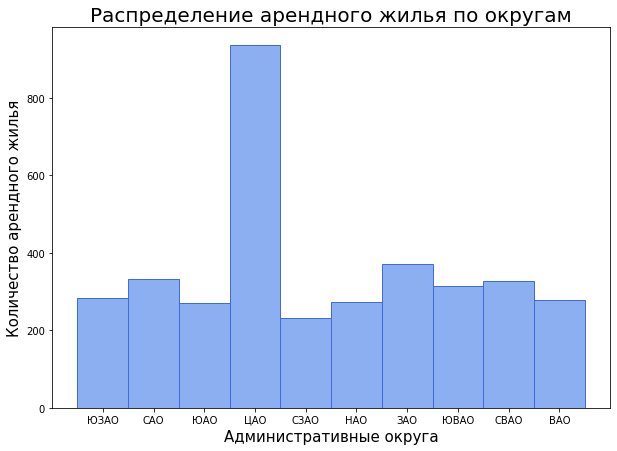

In [24]:
fig, ax = plt.subplots(figsize=(10, 7))

ax.set_title('Распределение арендного жилья по округам', fontsize=20)
ax.set_xlabel('Административные округа', fontsize=15)
ax.set_ylabel('Количество арендного жилья', fontsize=15)

sns.histplot(df['Адм. Округа'],
             color='cornflowerblue',
             edgecolor='royalblue')

plt.show()

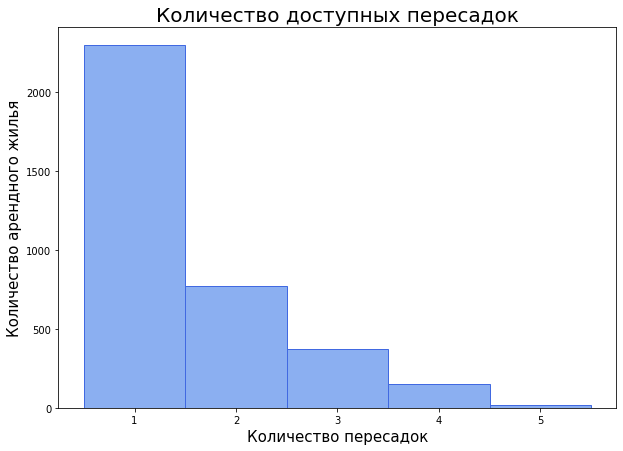

In [25]:
fig, ax = plt.subplots(figsize=(10, 7))

ax.set_title('Количество доступных пересадок', fontsize=20)
ax.set_xlabel('Количество пересадок', fontsize=15)
ax.set_ylabel('Количество арендного жилья', fontsize=15)

sns.histplot(df['Все пересадки'].sort_values().astype(str),
             color='cornflowerblue',
             edgecolor='royalblue')

plt.show()

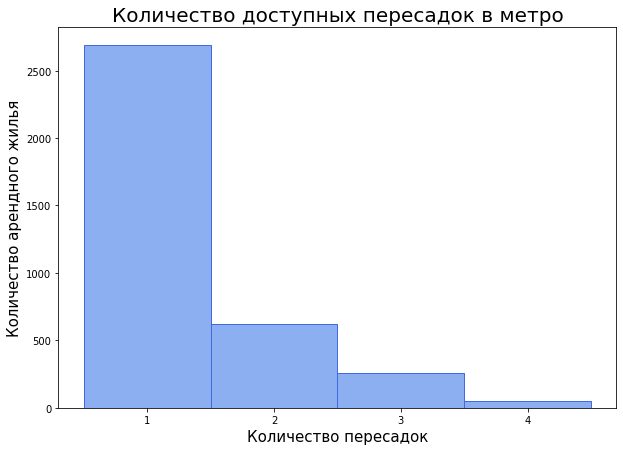

In [26]:
fig, ax = plt.subplots(figsize=(10, 7))

ax.set_title('Количество доступных пересадок в метро', fontsize=20)
ax.set_xlabel('Количество пересадок', fontsize=15)
ax.set_ylabel('Количество арендного жилья', fontsize=15)

sns.histplot(df['Ветки метро'].sort_values().astype(str),
             color='cornflowerblue',
             edgecolor='royalblue')

plt.show()

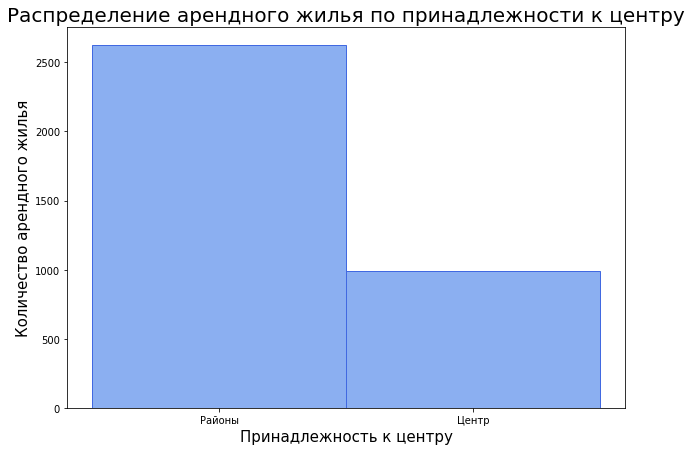

In [27]:
fig, ax = plt.subplots(figsize=(10, 7))

ax.set_title('Распределение арендного жилья по принадлежности к центру', fontsize=20)
ax.set_xlabel('Принадлежность к центру', fontsize=15)
ax.set_ylabel('Количество арендного жилья', fontsize=15)

sns.histplot(df['Центр'].sort_values().astype(str),
             color='cornflowerblue',
             edgecolor='royalblue')

plt.xticks(np.arange(2), labels=['Районы', 'Центр'])

plt.show()

In [28]:
df[['rooms', 'storey', 'storeys']] = df[['rooms', 'storey', 'storeys']].astype(int)

# Добавляем столбец для квартир с одной комнатой
df['Одна комната'] = 0
df.loc[df['rooms'] == 1, 'Одна комната'] = 1

# Добавляем столбец для квартир расположенных на первом этаже
df['Первый этаж'] = 0
df.loc[df['storey'] == 1, 'Первый этаж'] = 1

df.head()

,metro,price,minutes,way,provider,fee_percent,views,storey,storeys,rooms,...,Пересадка на загородные электрички,Ветки метро,Все пересадки,Центр,Кольцевая,БКЛ,Больше одной станции,Внутри ТТК,Одна комната,Первый этаж
0,Akademicheskaia,95000,10,walk,agency,0,36,7,25,3,...,0,1,1,0,0,0,0,0,0,0
1,Akademicheskaia,70000,14,walk,realtor,0,95,5,5,2,...,0,1,1,0,0,0,0,0,0,0
2,Akademicheskaia,25000,8,walk,agency,48,29,15,16,1,...,0,1,1,0,0,0,0,0,1,0
3,Akademicheskaia,95000,13,walk,developer,50,9,6,17,3,...,0,1,1,0,0,0,0,0,0,0
4,Akademicheskaia,60000,13,walk,developer,50,42,1,10,1,...,0,1,1,0,0,0,0,0,1,1


__Комментарий:__ _первоначально деление происходило на 4 группы, но позже было решено сделать разделение в 3 группы, поскольку "быстро на транспорте" до метро по сути то же самое, что и "долго пешком"_

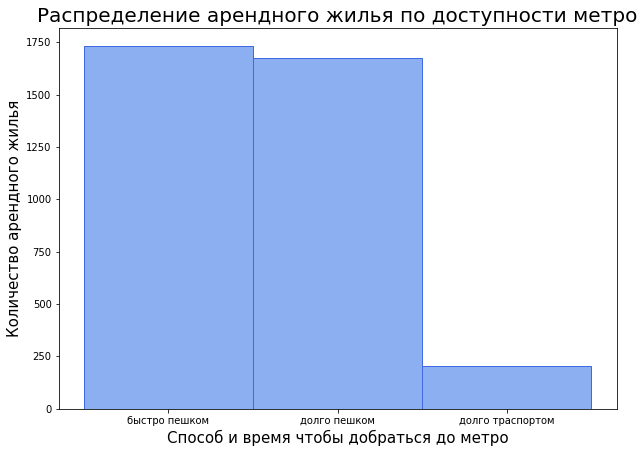

In [29]:
df['доступносность метро'] = 0

df.loc[(df.way == 'walk') & (df.minutes <= 10), 'доступносность метро'] = 'быстро пешком'
df.loc[(df.way == 'walk') & (df.minutes > 10), 'доступносность метро'] = 'долго пешком'
df.loc[(df.way == 'transport') & (df.minutes <= 15), 'доступносность метро'] = 'долго пешком' #'быстро траспортом'
df.loc[(df.way == 'transport') & (df.minutes > 15), 'доступносность метро'] = 'долго траспортом'

fig, ax = plt.subplots(figsize=(10, 7))

ax.set_title('Распределение арендного жилья по доступности метро', fontsize=20)
ax.set_xlabel('Способ и время чтобы добраться до метро', fontsize=15)
ax.set_ylabel('Количество арендного жилья', fontsize=15)

sns.histplot(df['доступносность метро'].sort_values().astype(str),
             color='cornflowerblue',
             edgecolor='royalblue')

plt.show()

# 6. Сортировка по цене

In [30]:
df.sort_values(by='price', inplace=True)

df['log_price'] = np.log(df.price)
IQR = np.quantile(df.price, 0.75) - np.quantile(df.price, 0.25)
IQR_log = np.quantile(df.log_price, 0.75) - np.quantile(df.log_price, 0.25)

# удаление крайних значений по цене
df_cut_by_price = df.loc[df.price <= np.quantile(df.price, 0.75) + 1.5 * IQR] 

# удаление крайних значений по логарифму цены
df_cut_by_log_price = df.loc[df.log_price <= np.quantile(df.log_price, 0.75) + 1.5 * IQR_log]

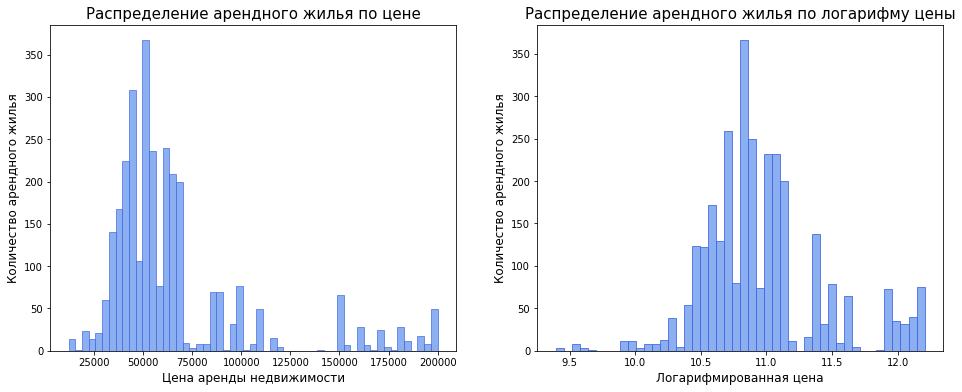

In [31]:
plt.figure(figsize = (16, 6))

plt.subplot(1, 2, 1)
sns.histplot(df_cut_by_price.price, color='cornflowerblue', edgecolor='royalblue')
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel('Цена аренды недвижимости', fontsize=12)
plt.ylabel('Количество арендного жилья', fontsize=12)
plt.title('Распределение арендного жилья по цене', fontsize=15)

plt.subplot(1, 2, 2)
sns.histplot(np.log(df_cut_by_price.price), color='cornflowerblue', edgecolor='royalblue')
plt.xlabel('Логарифмированная цена', fontsize=12)
plt.ylabel('Количество арендного жилья', fontsize=12)
plt.title('Распределение арендного жилья по логарифму цены', fontsize=15)

plt.show()

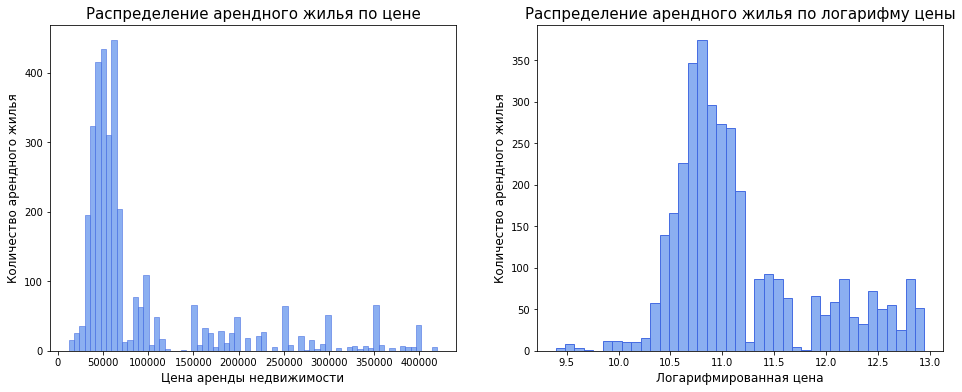

In [32]:
plt.figure(figsize = (16, 6))

plt.subplot(1, 2, 1)
sns.histplot(df_cut_by_log_price.price, color='cornflowerblue', edgecolor='royalblue')
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel('Цена аренды недвижимости', fontsize=12)
plt.ylabel('Количество арендного жилья', fontsize=12)
plt.title('Распределение арендного жилья по цене', fontsize=15)

plt.subplot(1, 2, 2)
sns.histplot(np.log(df_cut_by_log_price.price), color='cornflowerblue', edgecolor='royalblue')
plt.xlabel('Логарифмированная цена', fontsize=12)
plt.ylabel('Количество арендного жилья', fontsize=12)
plt.title('Распределение арендного жилья по логарифму цены', fontsize=15)

plt.show()

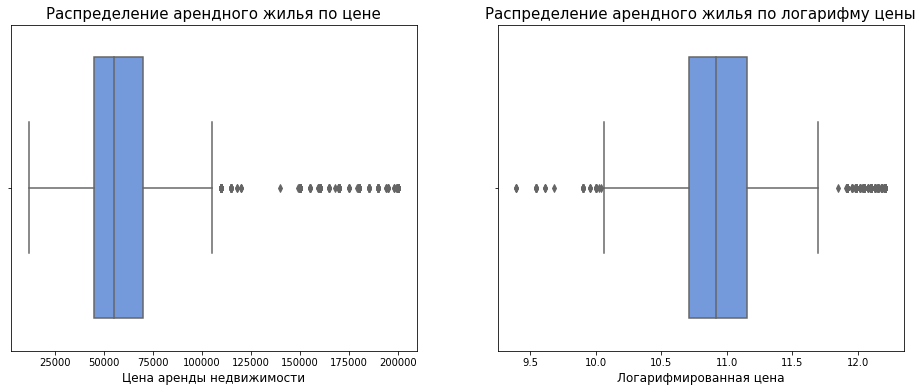

In [33]:
plt.figure(figsize = (16, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x=df_cut_by_price.price, color='cornflowerblue')
plt.xlabel('Цена аренды недвижимости', fontsize=12)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Распределение арендного жилья по цене', fontsize=15)

plt.subplot(1, 2, 2)
sns.boxplot(x=np.log(df_cut_by_price.price), color='cornflowerblue')
plt.xlabel('Логарифмированная цена', fontsize=12)
plt.title('Распределение арендного жилья по логарифму цены', fontsize=15)

plt.show()
# ящик с усами после чистки данных по цене

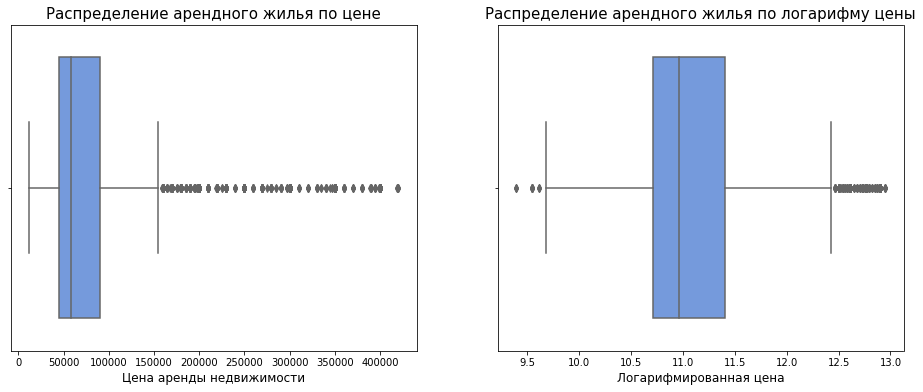

In [34]:
plt.figure(figsize = (16, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x=df_cut_by_log_price.price, color='cornflowerblue')
plt.xlabel('Цена аренды недвижимости', fontsize=12)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Распределение арендного жилья по цене', fontsize=15)

plt.subplot(1, 2, 2)
sns.boxplot(x=np.log(df_cut_by_log_price.price), color='cornflowerblue')
plt.xlabel('Логарифмированная цена', fontsize=12)
plt.title('Распределение арендного жилья по логарифму цены', fontsize=15)

plt.show()
# ящик с усами после чистки данных по логарифму цены

In [35]:
dff = df_cut_by_log_price.copy()

### _Разбивка по цене для квартир с определенным количеством комнат (не применяется)_

`df_1 = dff[dff.rooms == 1].copy()` \
\
`df_1.loc[df_1.price <= 30000]` \
`df_1.loc[(df_1.price > 30000) & (df_1.price <= 60000)]` \
`df_1.loc[(df_1.price > 60000) & (df_1.price <= 90000)]` \
`df_1.loc[df_1.price > 90000]` \

######

`df_2 = dff[dff.rooms == 2].copy()` \
\
`df_2.loc[df_2.price <= 50000]` \ 
`df_2.loc[(df_2.price > 50000) & (df_2.price <= 80000)]` \
`df_2.loc[(df_2.price > 80000) & (df_2.price <= 120000)]` \
`df_2.loc[df_2.price > 120000]` \

######

`df_3 = dff[dff.rooms == 3].copy()`\
\
`df_3.loc[df_3.price <= 60000]` \
`df_3.loc[(df_3.price > 60000) & (df_3.price <= 100000)]` \
`df_3.loc[(df_3.price > 100000) & (df_3.price <= 170000)]` \
`df_3.loc[df_3.price > 170000]`

# 7. Только 1-2-3 комнатные

Было принято решение оставить только 1, 2-х и 3-х комнатные квартиры, постольку именно таких наблюдений абсолютное большинство. А вот квартир с 4+ комнатами достаточно мало, что может исказить конечный результат исследования

In [36]:
df_r = dff[dff.rooms < 4]

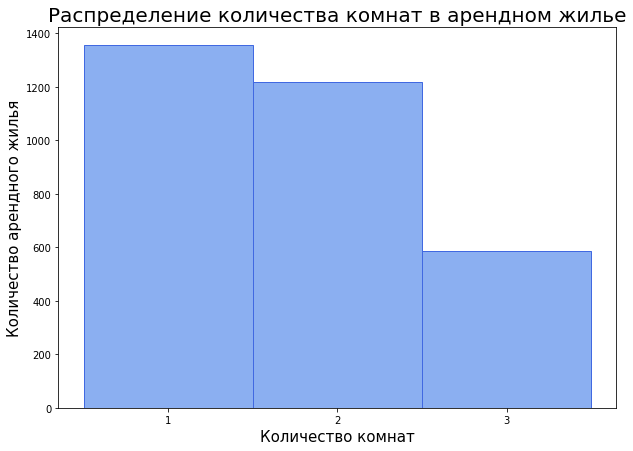

In [37]:
fig, ax = plt.subplots(figsize=(10, 7))

ax.set_title('Распределение количества комнат в арендном жилье', fontsize=20)
ax.set_xlabel('Количество комнат', fontsize=15)
ax.set_ylabel('Количество арендного жилья', fontsize=15)

sns.histplot(df_r.rooms.astype(str),
             color='cornflowerblue',
             edgecolor='royalblue')

plt.savefig('Rooms.png', facecolor ="white", edgecolor ='white')

plt.show()

# 8. Разбивка на сегменты по цене

### Разбивка на сегменты по абсолютной цене

<ipython-input-38-a86dcb9bb230>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_r['Сегмент'] = 0


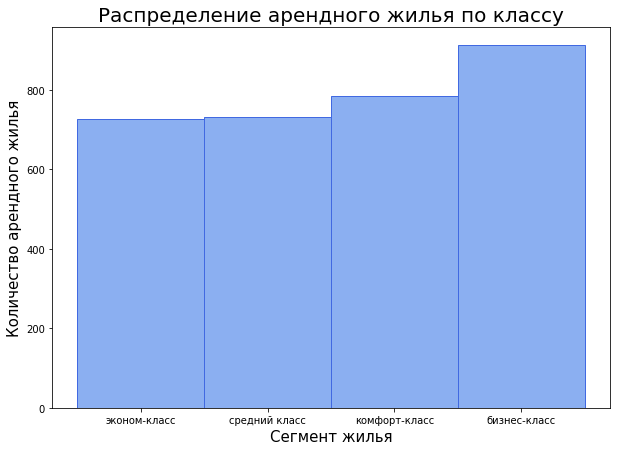

In [38]:
df_r['Сегмент'] = 0

df_r.loc[df_r.price < np.quantile(df_r.price, 0.25), 
        'Сегмент'] = 'эконом-класс'
df_r.loc[(df_r.price >= np.quantile(df_r.price, 0.25)) & (df_r.price < np.quantile(df_r.price, 0.5)), 
        'Сегмент'] = 'средний класс'
df_r.loc[(df_r.price >= np.quantile(df_r.price, 0.5)) & (df_r.price < np.quantile(df_r.price, 0.75)), 
        'Сегмент'] = 'комфорт-класс'
df_r.loc[df_r.price >= np.quantile(df_r.price, 0.75),
        'Сегмент'] = 'бизнес-класс'

df = df_r.copy()


fig, ax = plt.subplots(figsize=(10, 7))

ax.set_title('Распределение арендного жилья по классу', fontsize=20)
ax.set_xlabel('Сегмент жилья', fontsize=15)
ax.set_ylabel('Количество арендного жилья', fontsize=15)

sns.histplot(df['Сегмент'],
             color='cornflowerblue',
             edgecolor='royalblue')

plt.show()

### Разбивка на сегменты по логарифму цены

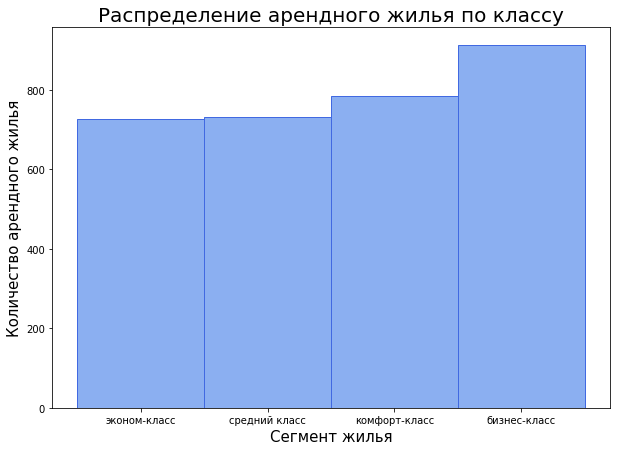

In [39]:
df['log_segment'] = 0
    
df.loc[df.log_price <= np.quantile(df.log_price, 0.25), 'log_segment'] = 'эконом-класс'
df.loc[(df.log_price > np.quantile(df.log_price, 0.25)) & (df.log_price <= np.quantile(df.log_price, 0.5)),
       'log_segment'] = 'средний класс'
df.loc[(df.log_price > np.quantile(df.log_price, 0.5)) & (df.log_price <= np.quantile(df.log_price, 0.75)), 
       'log_segment'] = 'комфорт-класс'
df.loc[df.log_price > np.quantile(df.log_price, 0.75), 'log_segment'] = 'бизнес-класс'

###

fig, ax = plt.subplots(figsize=(10, 7))

ax.set_title('Распределение арендного жилья по классу', fontsize=20)
ax.set_xlabel('Сегмент жилья', fontsize=15)
ax.set_ylabel('Количество арендного жилья', fontsize=15)

sns.histplot(df['Сегмент'],
             color='cornflowerblue',
             edgecolor='royalblue')

plt.show()

# 1. OLS

Предварительная обработка данных:

In [ ]:
df_to_encode = df[['metro', 'way', 'provider', 'Адм. Округа', 'По районам', 'доступносность метро', 'Сегмент']]

for col in df_to_encode:
    df_to_encode[col+'_code'] = pd.factorize(df_to_encode[col])[0]

df_encoded = df_to_encode[['metro_code', 'way_code', 'provider_code', 'Адм. Округа_code', 
           'По районам_code', 'доступносность метро_code', 'Сегмент_code']]

## 1.1. OLS с ценами в абсолютных значениях

In [55]:
import statsmodels.api as sm
### Построение модели

df_1 = df[['price', 'minutes', 'views', 'storey', 'storeys', 'rooms', 'living_area', 'kitchen_area', 'fee_percent']]
df_model_1 = df_1.join(df_encoded[['metro_code', 'way_code', 'provider_code']])

X = df_model_1.drop(columns=['price'])
y = df_model_1['price']

#### Прогон модели
X = sm.add_constant(X)

model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     817.0
Date:                Fri, 26 May 2023   Prob (F-statistic):               0.00
Time:                        18:16:50   Log-Likelihood:                -37405.
No. Observations:                3156   AIC:                         7.483e+04
Df Residuals:                    3144   BIC:                         7.491e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.515e+04   3835.107     -3.950

## 1.2. OLS с ценами в логарифм 

In [57]:
import statsmodels.api as sm
### Построение модели

df_1 = df[['log_price', 'minutes', 'views', 'storey', 'storeys', 'rooms', 'living_area', 'kitchen_area', 'fee_percent']]
df_model_1 = df_1.join(df_encoded[['metro_code', 'way_code', 'provider_code']])

X = df_model_1.drop(columns=['log_price'])
y = df_model_1['log_price']

#### Прогон модели
X = sm.add_constant(X)

model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     1002.
Date:                Fri, 26 May 2023   Prob (F-statistic):               0.00
Time:                        18:18:14   Log-Likelihood:                -394.14
No. Observations:                3156   AIC:                             812.3
Df Residuals:                    3144   BIC:                             885.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             9.9700      0.031    322.023

__Вывод:__ лучше брать логарифмированную цену

## 1.3. Графическая проверка на наличие эндогенности

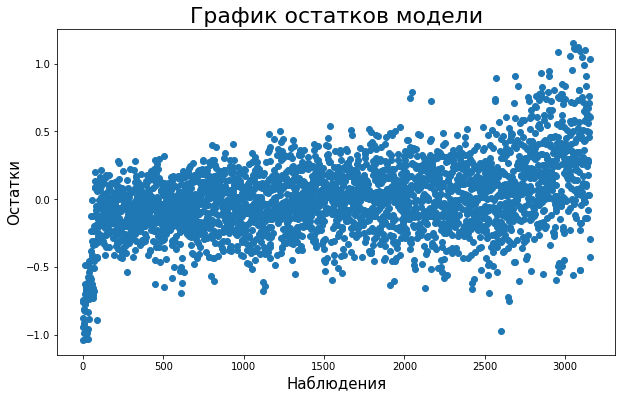

In [59]:
residuals_1 = results.resid

# Построение графика остатков модели
plt.figure(figsize=(10, 6))
plt.scatter(range(len(residuals_1)), residuals_1)
plt.xlabel('Наблюдения',  fontsize=15)
plt.ylabel('Остатки',  fontsize=15)
plt.title('График остатков модели',  fontsize=22)
plt.show()

__Вывод:__ на графике видно, что остатки показывают изменение в разбросе, следовательно в данной моделе присутствует гетероскедастичность. Что также является косвенным признаком возможного присутствия эндогенности в модели.

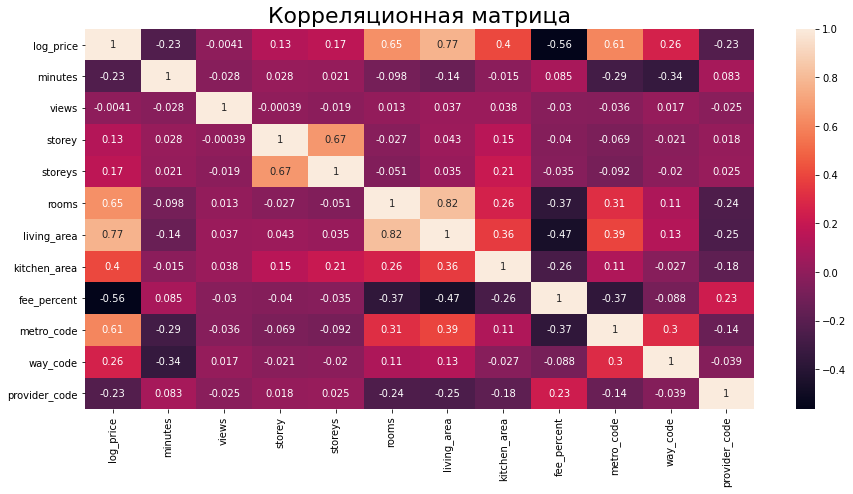

In [60]:
fig, ax = plt.subplots(figsize=(15, 7))
ax = sns.heatmap(data=df_model_1.corr(), ax=ax, annot=True)
ax.set_title('Корреляционная матрица', fontsize=22);

__Результат визуального анализа:__
1) Присутствует мультиколлинеарность:
- Между признаками этажа и количества этажей в здании
- Между признаками количества комнат и жилой площади

2) Вероятно присутствует эндогенность:
- Сильная корреляция по Пирсону между логарифмом цены (зависимая переменная) и признаком количества комнат
- Сильная корреляция по Пирсону между логарифмом цены (зависимая переменная) и признаком жилой площади
- Сильная корреляция по Пирсону между логарифмом цены (зависимая переменная) и признаком станции метро
- Сильная корреляция по Пирсону между логарифмом цены (зависимая переменная) и признаком процентного сбора арендодателя

3) Также:
- Умеренная корреляция по Пирсону между логарифмом цены (зависимая переменная) и признаком площади кухни

__Вывод:__ _Предполагаем, что эндогенность присутствует. Предположительно эндогенными могут являться переменные: "rooms", "living_area", "fee_percent", "metro_code"_

__!!!__ прописать про Пирсона __!!!__

## 1.4. Тесты на наличие эндогенности - тест Ву-Хаусмана

In [91]:
import numpy as np
from statsmodels.sandbox.regression.gmm import IV2SLS
from scipy.stats import chi2


endog = df['rooms']

exog = df[['views', 'storey', 'storeys', 'kitchen_area', 'Одна комната', 'Первый этаж', 
           'minutes', 'доступносность метро_code']]

instrument = df[['Адм. Округа_code', 'По районам_code', 'За МКАД', 'Конечная', 'МЦК', 'D1', 'D2',
       'Пересадка на загородные электрички', 'Ветки метро', 'Все пересадки',
       'Кольцевая', 'БКЛ', 'Больше одной станции', 'Внутри ТТК',
       'Одна комната', 'Первый этаж']]



# Оценка модели 2SLS
res_2sls = IV2SLS(endog, exog, instrument).fit()

# Оценка модели OLS
res_ols = sm.OLS(endog, exog).fit()

# Вычисление разности оценок параметров
delta_b = res_2sls.params - res_ols.params

# Вычисление ковариационной матрицы разности оценок
cov_delta_b = res_2sls.cov_params() - res_ols.cov_params()

# Вычисление статистики Хаусмана-Ву
hausman_wu_stat = np.dot(delta_b.T, np.linalg.inv(cov_delta_b)).dot(delta_b)

# Вычисление критического значения и p-значения
dff = exog.shape[1]
p_value = 1 - chi2.cdf(hausman_wu_stat, dff)

# Вывод результатов
print("Тест Хаусмана-Ву:")
print("Статистика Хаусмана-Ву: ", hausman_wu_stat)
print("p-значение: ", f'{p_value:.2f}')

Тест Хаусмана-Ву:
Статистика Хаусмана-Ву:  44.96899637889235
p-значение:  0.00


__Вывод:__ p-value маленькое, переменная "rooms" эндогенна

In [86]:
endog = df['fee_percent']

exog = df[['views', 'storey', 'storeys', 'kitchen_area', 'Одна комната', 'Первый этаж', 'minutes', 
           'доступносность метро_code']]

instrument = df[['total_area', 'living_area', 'Центр', 'provider_code', 'Ветки метро']]


# Оценка модели 2SLS
res_2sls = IV2SLS(endog, exog, instrument).fit()

# Оценка модели OLS
res_ols = sm.OLS(endog, exog).fit()

# Вычисление разности оценок параметров
delta_b = res_2sls.params - res_ols.params

# Вычисление ковариационной матрицы разности оценок
cov_delta_b = res_2sls.cov_params() - res_ols.cov_params()

# Вычисление статистики Хаусмана-Ву
hausman_wu_stat = np.dot(delta_b.T, np.linalg.inv(cov_delta_b)).dot(delta_b)

# Вычисление критического значения и p-значения
dff = exog.shape[1]
p_value = 1 - chi2.cdf(hausman_wu_stat, dff)

# Вывод результатов
print("Тест Хаусмана-Ву:")
print("Статистика Хаусмана-Ву: ", hausman_wu_stat)
print("p-значение: ", p_value)

Тест Хаусмана-Ву:
Статистика Хаусмана-Ву:  0.20631032253034243
p-значение:  0.9999956551497197


__Вывод:__ p-value большое, переменная "fee_percent" не эндогенна

In [85]:
endog = df['living_area']

exog = df[['views', 'storey', 'storeys', 'fee_percent', 'Одна комната', 'Первый этаж', 'minutes', 
           'доступносность метро_code']]

instrument = df[['Адм. Округа_code', 'По районам_code', 'За МКАД', 'Конечная',
       'Пересадка на загородные электрички', 'Кольцевая', 'БКЛ', 'Внутри ТТК','Одна комната', 'Первый этаж']]



# Оценка модели 2SLS
res_2sls = IV2SLS(endog, exog, instrument).fit()

# Оценка модели OLS
res_ols = sm.OLS(endog, exog).fit()

# Вычисление разности оценок параметров
delta_b = res_2sls.params - res_ols.params

# Вычисление ковариационной матрицы разности оценок
cov_delta_b = res_2sls.cov_params() - res_ols.cov_params()

# Вычисление статистики Хаусмана-Ву
hausman_wu_stat = np.dot(delta_b.T, np.linalg.inv(cov_delta_b)).dot(delta_b)

# Вычисление критического значения и p-значения
dff = exog.shape[1]
p_value = 1 - chi2.cdf(hausman_wu_stat, dff)

# Вывод результатов
print("Тест Хаусмана-Ву:")
print("Статистика Хаусмана-Ву: ", hausman_wu_stat)
print("p-значение: ", p_value)

Тест Хаусмана-Ву:
Статистика Хаусмана-Ву:  24.048832204764153
p-значение:  0.00224897937708346


__Вывод:__ p-value маленькое, переменная "living_area" эндогенна

In [100]:
endog = df_encoded[['metro_code']]

df[['way_code', 'provider_code', 'доступносность метро_code', 'Адм. Округа_code', 'По районам_code']] = df_encoded[['way_code', 'provider_code', 'доступносность метро_code', 'Адм. Округа_code', 'По районам_code']]

exog = df[['views', 'storey', 'storeys', 'fee_percent', 'Одна комната', 'Первый этаж', 'minutes', 
           'доступносность метро_code']]

#exog = df[['views', 'storey', 'storeys', 'kitchen_area', 'fee_percent', 
#           'way_code', 'provider_code', 'Одна комната', 'Первый этаж', 'minutes', 'доступносность метро_code']]

instrument = df[['За МКАД', 'Конечная', 'Все пересадки', 'Центр', 'Больше одной станции', 'Внутри ТТК', 'total_area']]



#'Адм. Округа_code', 'По районам_code', ,'D1', 'D2','МЦК',, 'Кольцевая', 'БКЛ', 'Пересадка на загородные электрички', 'Ветки метро', 

# Оценка модели 2SLS
res_2sls = IV2SLS(endog, exog, instrument).fit()

# Оценка модели OLS
res_ols = sm.OLS(endog, exog).fit()

# Вычисление разности оценок параметров
delta_b = res_2sls.params - res_ols.params

# Вычисление ковариационной матрицы разности оценок
cov_delta_b = res_2sls.cov_params() - res_ols.cov_params()

# Вычисление статистики Хаусмана-Ву
hausman_wu_stat = np.dot(delta_b.T, np.linalg.inv(cov_delta_b)).dot(delta_b)

# Вычисление критического значения и p-значения
dff = exog.shape[1]
p_value = 1 - chi2.cdf(hausman_wu_stat, dff)

# Вывод результатов
print("Тест Хаусмана-Ву:")
print("Статистика Хаусмана-Ву: ", hausman_wu_stat)
print("p-значение: ", f'{p_value:.2f}')

Тест Хаусмана-Ву:
Статистика Хаусмана-Ву:  48.634645308667544
p-значение:  0.00


__Вывод:__ p-value маленькое, переменная "metro_code" эндогенна

In [101]:
endog = df['kitchen_area']

exog = df[['views', 'storey', 'storeys', 'fee_percent', 'Одна комната', 'Первый этаж', 'minutes', 
           'доступносность метро_code']]

instrument = df[['Адм. Округа_code', 'По районам_code', 'За МКАД', 'Конечная',
       'Пересадка на загородные электрички', 'Кольцевая', 'БКЛ', 'Внутри ТТК','Одна комната', 'Первый этаж']]



# Оценка модели 2SLS
res_2sls = IV2SLS(endog, exog, instrument).fit()

# Оценка модели OLS
res_ols = sm.OLS(endog, exog).fit()

# Вычисление разности оценок параметров
delta_b = res_2sls.params - res_ols.params

# Вычисление ковариационной матрицы разности оценок
cov_delta_b = res_2sls.cov_params() - res_ols.cov_params()

# Вычисление статистики Хаусмана-Ву
hausman_wu_stat = np.dot(delta_b.T, np.linalg.inv(cov_delta_b)).dot(delta_b)

# Вычисление критического значения и p-значения
dff = exog.shape[1]
p_value = 1 - chi2.cdf(hausman_wu_stat, dff)

# Вывод результатов
print("Тест Хаусмана-Ву:")
print("Статистика Хаусмана-Ву: ", hausman_wu_stat)
print("p-значение: ", p_value)

Тест Хаусмана-Ву:
Статистика Хаусмана-Ву:  5.7476176584414045
p-значение:  0.6754784562451182


__Вывод:__ P-value слишком большое, гипотеза не отвергается, эндогенности у переменной "kitchen_area" нет

## 1.5. Выбор между "living_area" и "rooms"

__Причина:__ большая корреляция => мультиколлинеарность

In [122]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df[['living_area', 'rooms']]

# X - матрица предикторов
vif = [variance_inflation_factor(X, i) for i in range(X.shape[1])]

print('Значение VIF =', vif[0])

Значение VIF = 12.832391466146609


Значит надо выбрать:

In [138]:
### Построение модели

df_1 = df[['log_price', 'minutes', 'views', 'storey', 'storeys', 'rooms', 'living_area', 'kitchen_area', 'fee_percent']]
df_model_1 = df_1.join(df_encoded[['metro_code', 'way_code', 'provider_code']])

X = df_model_1.drop(columns=['log_price'])
y = df_model_1['log_price']

#### Прогон модели
X = sm.add_constant(X)

model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     1002.
Date:                Fri, 26 May 2023   Prob (F-statistic):               0.00
Time:                        20:41:23   Log-Likelihood:                -394.14
No. Observations:                3156   AIC:                             812.3
Df Residuals:                    3144   BIC:                             885.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             9.9700      0.031    322.023

In [105]:
### Построение модели

df_1 = df[['log_price', 'minutes', 'views', 'storey', 'storeys', 'living_area', 'kitchen_area', 'fee_percent']]
df_model_1 = df_1.join(df_encoded[['metro_code', 'way_code', 'provider_code']])

X = df_model_1.drop(columns=['log_price'])
y = df_model_1['log_price']

#### Прогон модели
X = sm.add_constant(X)

model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     1075.
Date:                Fri, 26 May 2023   Prob (F-statistic):               0.00
Time:                        20:02:48   Log-Likelihood:                -425.05
No. Observations:                3156   AIC:                             872.1
Df Residuals:                    3145   BIC:                             938.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            10.0417      0.030    336.019

In [153]:
### Построение модели

df_1 = df[['log_price', 'minutes', 'views', 'storey', 'storeys', 'rooms', 'kitchen_area', 'fee_percent']]
df_model_1 = df_1.join(df_encoded[['metro_code', 'way_code', 'provider_code']])

X = df_model_1.drop(columns=['log_price'])
y = df_model_1['log_price']

#### Прогон модели
X = sm.add_constant(X)

model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     863.2
Date:                Fri, 26 May 2023   Prob (F-statistic):               0.00
Time:                        21:42:34   Log-Likelihood:                -686.08
No. Observations:                3156   AIC:                             1394.
Df Residuals:                    3145   BIC:                             1461.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             9.9284      0.034    292.807

__Вывод:__ удаляем "living_area" так как оно имеет меньшее влияние на модель, как в общем случае, так и в частном

## 1.6. Борьба с эндогенностью переменных "metro_code" и "rooms" с помощью IV

### 1.6.1. "metro_code"

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.465
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     341.9
Date:                Fri, 26 May 2023   Prob (F-statistic):               0.00
Time:                        21:52:22   Log-Likelihood:                -1782.5
No. Observations:                3156   AIC:                             3583.
Df Residuals:                    3147   BIC:                             3637.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            10.9156      0.041    266.511

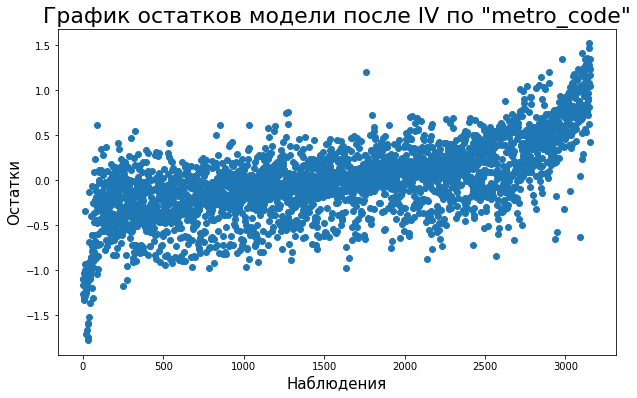

In [159]:
# Определение эндогенной переменной
endogenous_variable = df['metro_code']

# Определение инструментальных переменных
instrumental_variables = df[['Адм. Округа_code', 'По районам_code', 'За МКАД', 'Конечная', 'МЦК', 'D1', 'D2', 
                               'Пересадка на загородные электрички', 'Ветки метро', 'Все пересадки', 'Центр', 
                               'Кольцевая', 'БКЛ', 'Больше одной станции', 'Внутри ТТК', 'Одна комната', 'Первый этаж']]

# Добавление константы в данные
data_with_constant = sm.add_constant(df)

# Оценка модели с использованием инструментальных переменных
iv_model_metro = sm.OLS(data_with_constant['log_price'], 
                  data_with_constant[['const', 'minutes', 'views', 'storey', 'storeys',  
                                      'kitchen_area', 'fee_percent', 'way_code', 'provider_code']], 
                  hasconst=True).fit()

# Получение оценок коэффициентов
iv_metro_coefficients = iv_model_metro.params

# Вывод результатов
print(iv_model_metro.summary())

iv_metro_residuals = iv_model_metro.resid

# Построение графика остатков модели
plt.figure(figsize=(10, 6))
plt.scatter(range(len(iv_metro_residuals)), iv_metro_residuals)
plt.xlabel('Наблюдения',  fontsize=15)
plt.ylabel('Остатки',  fontsize=15)
plt.title('График остатков модели после IV по "metro_code"',  fontsize=22)
plt.show()

### 1.6.2. "rooms"

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     341.9
Date:                Fri, 26 May 2023   Prob (F-statistic):               0.00
Time:                        21:52:54   Log-Likelihood:                -1693.1
No. Observations:                3156   AIC:                             3406.
Df Residuals:                    3146   BIC:                             3467.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

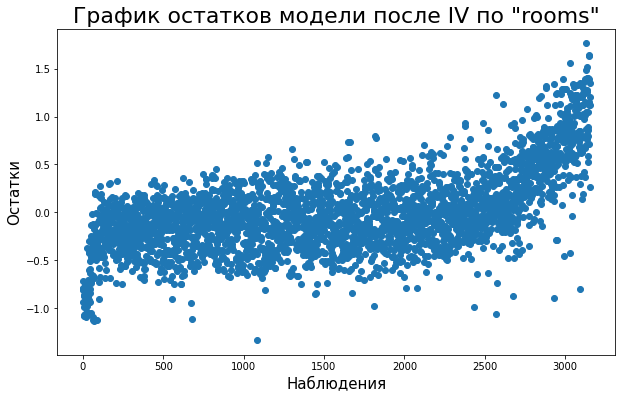

In [160]:
# Определение эндогенной переменной
endogenous_variable = df['rooms']

# Определение инструментальных переменных
instrumental_variables = df[[ 'По районам_code', 'За МКАД', 'Конечная', 'МЦК', 'D1', 'D2',
       'Пересадка на загородные электрички', 'Ветки метро', 'Все пересадки',
       'Кольцевая', 'БКЛ', 'Больше одной станции', 'Внутри ТТК']]

# Добавление константы в данные
data_with_constant = sm.add_constant(df)

# Оценка модели с использованием инструментальных переменных
iv_model_rooms = sm.OLS(data_with_constant['log_price'], 
                  data_with_constant[['const', 'views', 'storey', 'storeys', 'kitchen_area', 'Одна комната', 
                                      'Первый этаж', 'minutes', 'доступносность метро_code', 'Первый этаж', 
                                     'Адм. Округа_code']], 
                  hasconst=True).fit()

# Получение оценок коэффициентов
iv_rooms_coefficients = iv_model_rooms.params

# Вывод результатов
print(iv_model_rooms.summary())

iv_rooms_residuals = iv_model_rooms.resid

# Построение графика остатков модели
plt.figure(figsize=(10, 6))
plt.scatter(range(len(iv_rooms_residuals)), iv_rooms_residuals)
plt.xlabel('Наблюдения',  fontsize=15)
plt.ylabel('Остатки',  fontsize=15)
plt.title('График остатков модели после IV по "rooms"',  fontsize=22)
plt.show()

### 1.6.3. Общее

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     453.8
Date:                Fri, 26 May 2023   Prob (F-statistic):               0.00
Time:                        21:54:58   Log-Likelihood:                -1456.5
No. Observations:                3156   AIC:                             2933.
Df Residuals:                    3146   BIC:                             2994.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

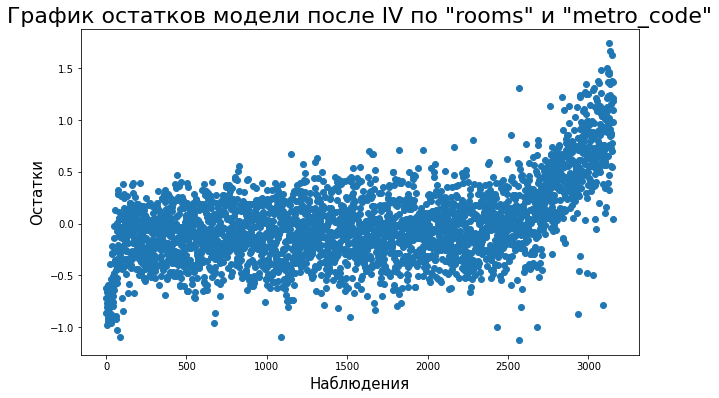

In [162]:
# Определение эндогенной переменной
endogenous_variable = df[['rooms', 'metro_code']]

# Определение инструментальных переменных
instrumental_variables = df[[ 'За МКАД', 'Конечная', 'Все пересадки', 
                             'Одна комната', 'Первый этаж', 'По районам_code', 'Пересадка на загородные электрички', 
                             'Ветки метро', 'Кольцевая', 'БКЛ', 'Больше одной станции', 'Внутри ТТК', 'МЦК', 'D1', 'D2']]

# Добавление константы в данные
data_with_constant = sm.add_constant(df)

# Оценка модели с использованием инструментальных переменных
iv_model_both = sm.OLS(data_with_constant['log_price'], 
                  data_with_constant[['const', 'views', 'storey', 'storeys', 'kitchen_area', 'Одна комната', 
                                      'Первый этаж', 'доступносность метро_code', 'Адм. Округа_code', 'По районам_code']], 
                  hasconst=True).fit()

# Получение оценок коэффициентов
iv_both_coefficients = iv_model_both.params

# Вывод результатов
print(iv_model_both.summary())

iv_both_residuals = iv_model_both.resid

# Построение графика остатков модели
plt.figure(figsize=(10, 6))
plt.scatter(range(len(iv_both_residuals)), iv_both_residuals)
plt.xlabel('Наблюдения',  fontsize=15)
plt.ylabel('Остатки',  fontsize=15)
plt.title('График остатков модели после IV по "rooms" и "metro_code"',  fontsize=22)
plt.show()

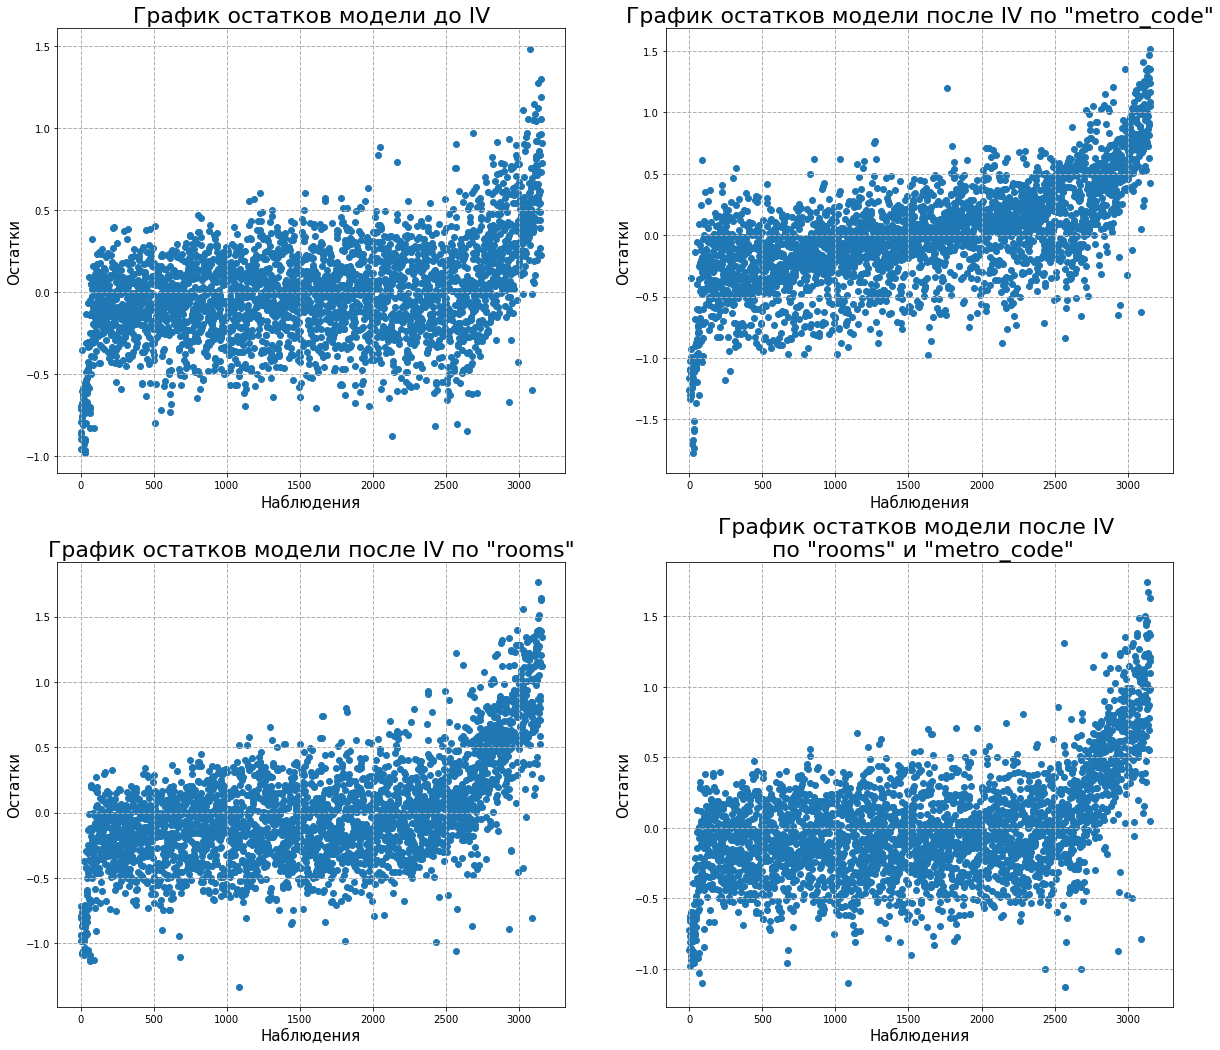

In [170]:
plt.figure(figsize = (20, 18))

plt.subplot(2, 2, 1)
plt.scatter(range(len(residuals_before)), residuals_before)
plt.xlabel('Наблюдения',  fontsize=15)
plt.ylabel('Остатки',  fontsize=15)
plt.title('График остатков модели до IV',  fontsize=22)
plt.grid(linestyle='--', linewidth=1)

plt.subplot(2, 2, 2)
plt.scatter(range(len(iv_metro_residuals)), iv_metro_residuals)
plt.xlabel('Наблюдения',  fontsize=15)
plt.ylabel('Остатки',  fontsize=15)
plt.title('График остатков модели после IV по "metro_code"',  fontsize=22)
plt.grid(linestyle='--', linewidth=1)

plt.subplot(2, 2, 3)
plt.scatter(range(len(iv_rooms_residuals)), iv_rooms_residuals)
plt.xlabel('Наблюдения',  fontsize=15)
plt.ylabel('Остатки',  fontsize=15)
plt.title('График остатков модели после IV по "rooms"',  fontsize=22)
plt.grid(linestyle='--', linewidth=1)

plt.subplot(2, 2, 4)
plt.scatter(range(len(iv_both_residuals)), iv_both_residuals)
plt.xlabel('Наблюдения',  fontsize=15)
plt.ylabel('Остатки',  fontsize=15)
plt.title('График остатков модели после IV \n по "rooms" и "metro_code"',  fontsize=22)
plt.grid(linestyle='--', linewidth=1)

plt.show()

## 1.7. Борьба с эндогенностью с помощью 2SLS

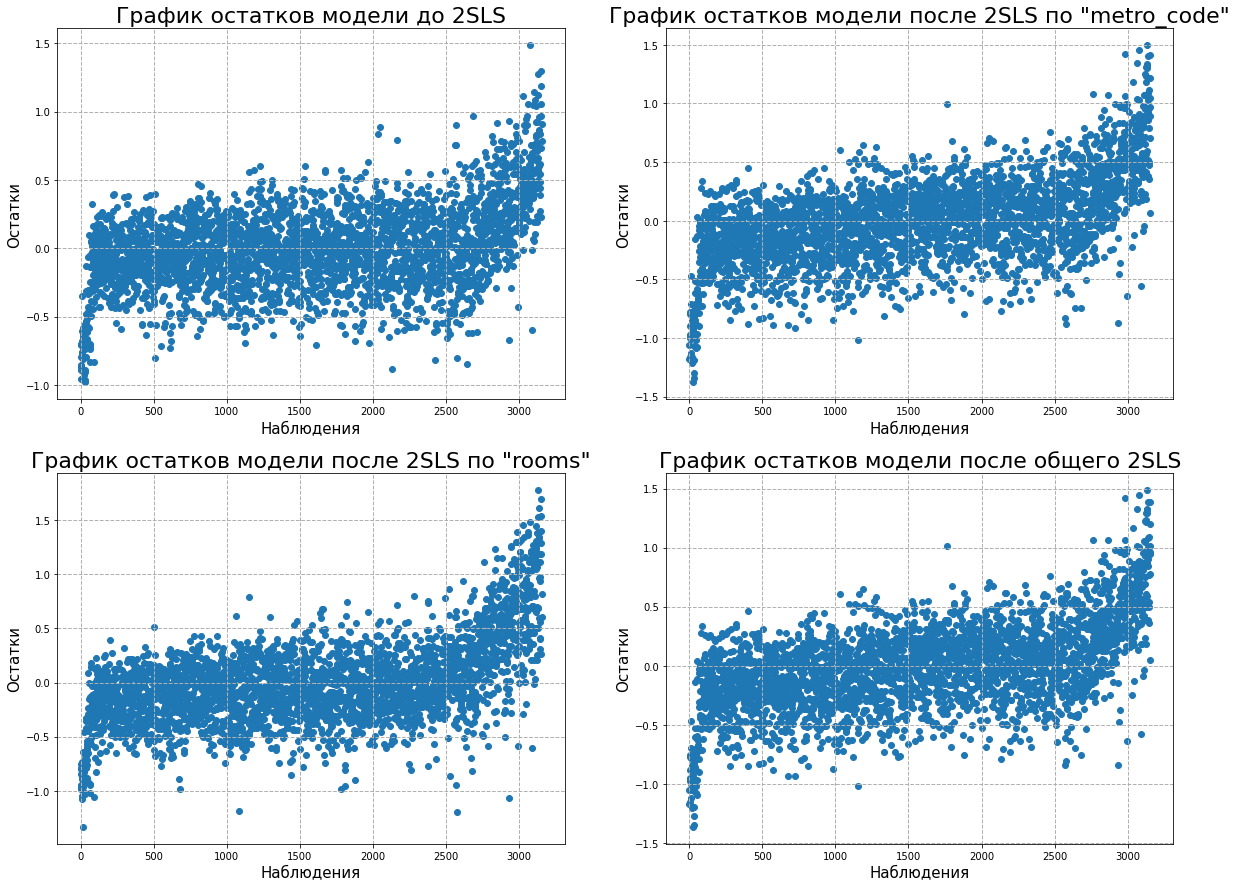

In [171]:
### До борьбы

residuals_before = results.resid


### 2SLS на метро

endogenous_variable = df['metro_code']

exogenous_variables = df[['minutes', 'views', 'storey', 'storeys', 'kitchen_area', 'fee_percent', 'way_code', 
                           'provider_code']]

instrumental_variables = df[['Адм. Округа_code', 'По районам_code', 'За МКАД', 'Конечная', 'МЦК', 'D1', 'D2', 
                               'Пересадка на загородные электрички', 'Ветки метро', 'Все пересадки', 'Центр', 
                               'Кольцевая', 'БКЛ', 'Больше одной станции', 'Внутри ТТК', 'Одна комната', 'Первый этаж']]


# Добавление константы к экзогенным переменным
exogenous_variables = sm.add_constant(exogenous_variables)

# Шаг 1: Оценка первой ступени модели
stage1_model = sm.OLS(endogenous_variable, instrumental_variables)
stage1_results = stage1_model.fit()

# Получение предсказанных значений эндогенной переменной
predicted_endogenous = stage1_results.predict()

# Добавление предсказанных значений в качестве новой переменной
exogenous_variables['predicted_metro'] = predicted_endogenous
df['predicted_metro'] = predicted_endogenous

# Определение ценевой переменной
y = df['log_price']

# Шаг 2: Оценка второй ступени модели
metro_model = sm.OLS(y, exogenous_variables) #endogenous_variable
metro_results = metro_model.fit()

residuals_metro = metro_results.resid


### 2SLS по комнатам

endogenous_variable = df['rooms']

exogenous_variables = df[['views', 'storey', 'storeys', 'kitchen_area', 'Одна комната', 
                            'Первый этаж', 'minutes', 'доступносность метро_code', 'Первый этаж', 'Адм. Округа_code']]

instrumental_variables = df[[ 'По районам_code', 'За МКАД', 'Конечная', 'МЦК', 'D1', 'D2',
       'Пересадка на загородные электрички', 'Ветки метро', 'Все пересадки',
       'Кольцевая', 'БКЛ', 'Больше одной станции', 'Внутри ТТК']]


# Добавление константы к экзогенным переменным
exogenous_variables = sm.add_constant(exogenous_variables)

# Шаг 1: Оценка первой ступени модели
stage1_model = sm.OLS(endogenous_variable, instrumental_variables)
stage1_results = stage1_model.fit()

# Получение предсказанных значений эндогенной переменной
predicted_endogenous = stage1_results.predict()

# Добавление предсказанных значений в качестве новой переменной
exogenous_variables['predicted_rooms'] = predicted_endogenous
df['predicted_rooms'] = predicted_endogenous

# Определение ценевой переменной
y = df['log_price']

# Шаг 2: Оценка второй ступени модели
rooms_model = sm.OLS(y, exogenous_variables) #endogenous_variable
rooms_results = rooms_model.fit()

residuals_rooms = rooms_results.resid


### После 2SLS

df_model = df[['log_price', 'minutes', 'views', 'storey', 'storeys', 'kitchen_area', 'fee_percent',
           'predicted_rooms', 'predicted_metro', 'way_code', 'provider_code']]

X = df_model.drop(columns=['log_price'])
y = df_model['log_price']

#### Прогон модели
X = sm.add_constant(X)

both_model = sm.OLS(y, X)
both_results = both_model.fit()

residuals_both = both_results.resid




plt.figure(figsize = (20, 15))

plt.subplot(2, 2, 1)
plt.scatter(range(len(residuals_before)), residuals_before)
plt.xlabel('Наблюдения',  fontsize=15)
plt.ylabel('Остатки',  fontsize=15)
plt.title('График остатков модели до 2SLS',  fontsize=22)
plt.grid(linestyle='--', linewidth=1)

plt.subplot(2, 2, 2)
plt.scatter(range(len(residuals_metro)), residuals_metro)
plt.xlabel('Наблюдения',  fontsize=15)
plt.ylabel('Остатки',  fontsize=15)
plt.title('График остатков модели после 2SLS по "metro_code"',  fontsize=22)
plt.grid(linestyle='--', linewidth=1)

plt.subplot(2, 2, 3)
plt.scatter(range(len(residuals_rooms)), residuals_rooms)
plt.xlabel('Наблюдения',  fontsize=15)
plt.ylabel('Остатки',  fontsize=15)
plt.title('График остатков модели после 2SLS по "rooms"',  fontsize=22)
plt.grid(linestyle='--', linewidth=1)

plt.subplot(2, 2, 4)
plt.scatter(range(len(residuals_both)), residuals_both)
plt.xlabel('Наблюдения',  fontsize=15)
plt.ylabel('Остатки',  fontsize=15)
plt.title('График остатков модели после общего 2SLS',  fontsize=22)
plt.grid(linestyle='--', linewidth=1)

plt.show()

In [173]:
print(both_results.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     493.6
Date:                Fri, 26 May 2023   Prob (F-statistic):               0.00
Time:                        22:53:36   Log-Likelihood:                -1280.4
No. Observations:                3156   AIC:                             2583.
Df Residuals:                    3145   BIC:                             2649.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              10.4418      0.044    2

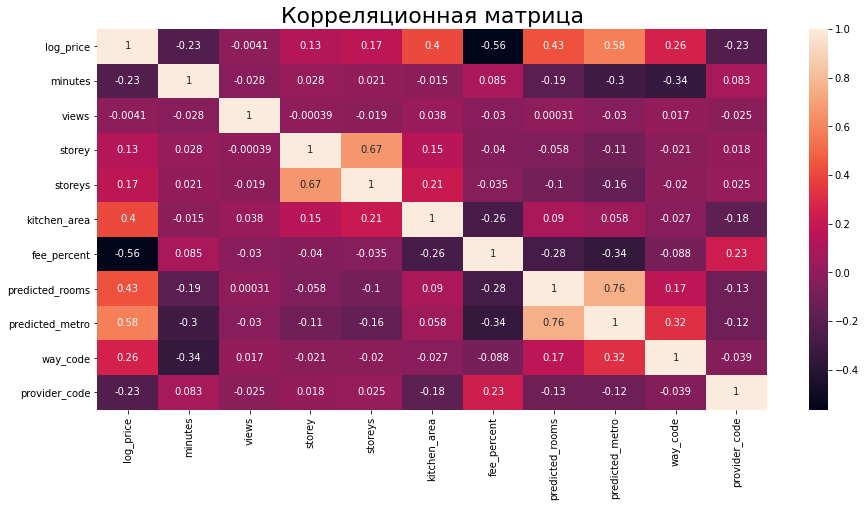

In [152]:
fig, ax = plt.subplots(figsize=(15, 7))
ax = sns.heatmap(data=df_model.corr(), ax=ax, annot=True)
ax.set_title('Корреляционная матрица', fontsize=22);

__Вывод:__ При построении новой корреляционной матрицы после применения метода 2SLS, можно заметить, что удалось уменьшить корреляцию наших эндогенных переменных с зависимой

In [180]:
from IPython.display import Image
url = "https://static01.nyt.com/images/2021/05/09/fashion/07ELON-MEMES1print/07ELON-MEMES1-mediumSquareAt3X.jpg"
Image(url=url)